In [4]:
# Library

# Firstly used libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Warnings

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Preprocessing

from sklearn.neighbors import LocalOutlierFactor 
from sklearn import preprocessing

# Modeling

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
!pip install lightgbm
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Model Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
# read the data
hitters=pd.read_csv("Hitters.csv")
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# DATA UNDERSTANDING

In [6]:
# There are 322 observations and int-float-object types of features in this data set.

df=hitters.copy()
print(df.shape)
df.info()

(322, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtype

In [7]:
#There are 59 null values in Hitters data set
df.isnull().sum().sum()

59

In [8]:
# All these NA values comes from "Salary" feature
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

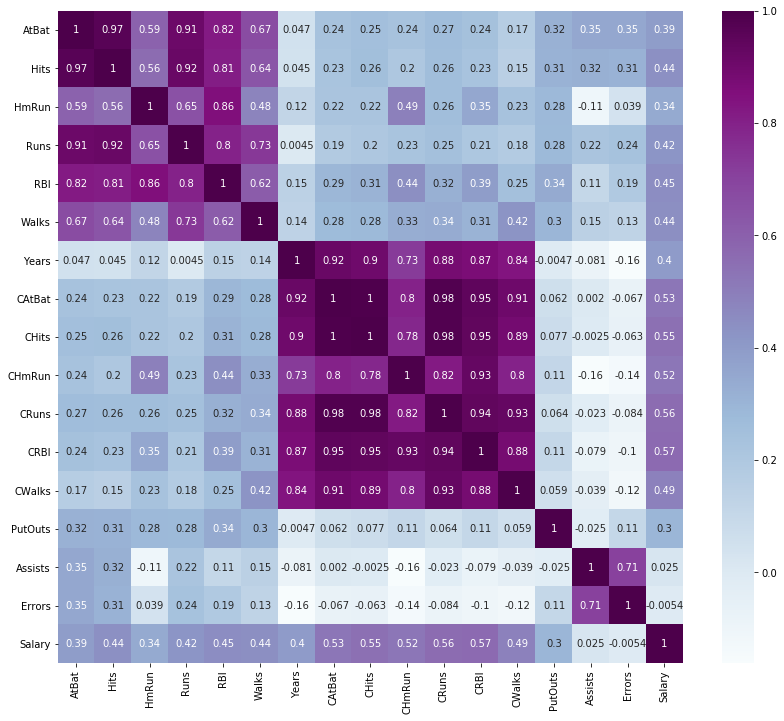

In [9]:
# There are high correlated  features within themselves. However,being high correlated is not a problem in machine learning algorithms.
# In addition, there isn't high correlation between independent features and target feature(Salary).
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap="BuPu");

In [10]:
# If the missing values don't come from Salary(target feature), i would have thought to assign mean according to these results.
# Because, there seems to be a relation between categoric variables and Salary values for example there is an important differences between being E Division and W Devision.

print("New League= A" ,df[df["NewLeague"]=="A"].agg({"Salary":"mean"}))
print("New League= N" ,df[df["NewLeague"]=="N"].agg({"Salary":"mean"}))
print("League= A" ,df[df["League"]=="A"].agg({"Salary":"mean"}))
print("League= N" ,df[df["League"]=="N"].agg({"Salary":"mean"}))
print("Division= E" ,df[df["Division"]=="E"].agg({"Salary":"mean"}))
print("Division= W" ,df[df["Division"]=="W"].agg({"Salary":"mean"}))

New League= A Salary    537.113028
dtype: float64
New League= N Salary    534.553852
dtype: float64
League= A Salary    541.999547
dtype: float64
League= N Salary    529.1175
dtype: float64
Division= E Salary    624.271364
dtype: float64
Division= W Salary    450.876873
dtype: float64


# DATA PREPROCESSING

## 1st Trial : df3

* **df1-->df2-->df3**

* drop NA values
* log transformation
* detect outliers and drop them
* size= 322-->261

In [11]:
#drop NA values

df1=df.dropna()
df1.shape

(263, 20)

In [12]:
# understanding skewness of the features ( It is acceptable if the skewness is btween -1 and 1)
# When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
# When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.
df1.skew(axis = 0, skipna = True) 

AtBat     -0.147623
Hits       0.241947
HmRun      0.794957
Runs       0.352831
RBI        0.561924
Walks      0.539639
Years      0.809867
CAtBat     1.317012
CHits      1.459543
CHmRun     2.197967
CRuns      1.523220
CRBI       1.531237
CWalks     1.860274
PutOuts    2.078838
Assists    1.175297
Errors     0.951468
Salary     1.588967
dtype: float64

In [13]:
df1.skew(axis = 0, skipna = True)[(df1.skew(axis = 0, skipna = True) >1) | (df1.skew(axis = 0, skipna = True)< -1)]

CAtBat     1.317012
CHits      1.459543
CHmRun     2.197967
CRuns      1.523220
CRBI       1.531237
CWalks     1.860274
PutOuts    2.078838
Assists    1.175297
Salary     1.588967
dtype: float64

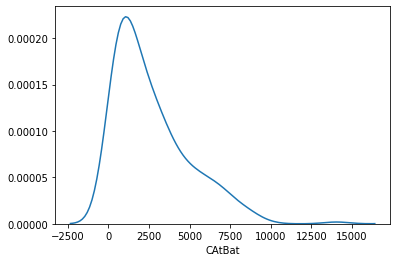

In [14]:
# Applying log transformation for right skewed features and applying exponential for left skewed features
sns.distplot(df1["CAtBat"], hist=False);

In [15]:
df1["CAtBat"]= np.log(df1["CAtBat"])

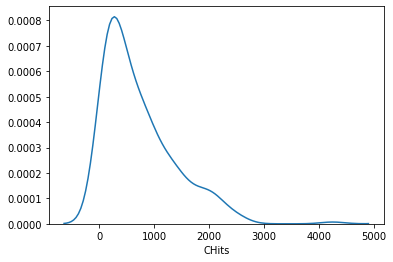

In [16]:
sns.distplot(df1["CHits"], hist=False);

In [17]:
df1["CHits"]= np.log(df1["CHits"])

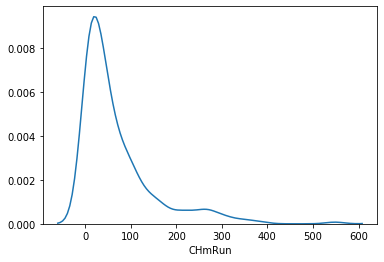

In [18]:
sns.distplot(df1["CHmRun"], hist=False);

In [19]:
df1["CHmRun"]=np.log(df1["CHmRun"])

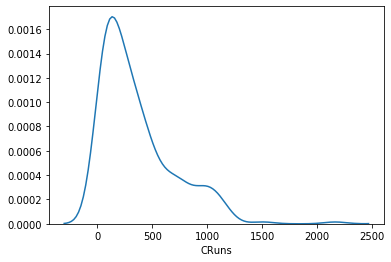

In [20]:
sns.distplot(df1["CRuns"], hist=False);

In [21]:
df1["CRuns"]= np.log(df1["CRuns"])

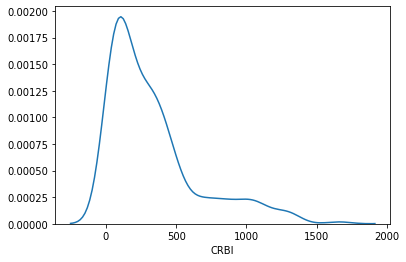

In [22]:
sns.distplot(df1["CRBI"], hist=False);

In [23]:
df1["CRBI"]= np.log(df1["CRBI"])

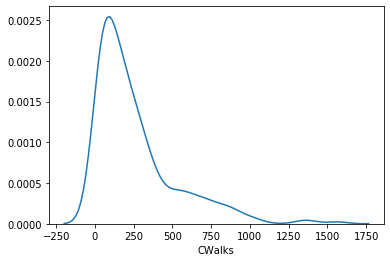

In [24]:
sns.distplot(df1["CWalks"], hist=False);

In [25]:
df1["CWalks"]= np.log(df1["CWalks"])

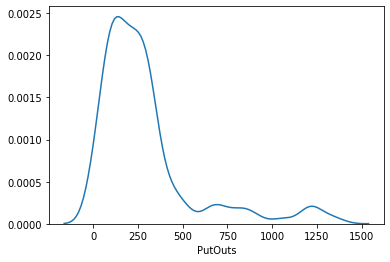

In [26]:
sns.distplot(df1["PutOuts"], hist=False);

In [27]:
df1["PutOuts"]= np.log(df1["PutOuts"])

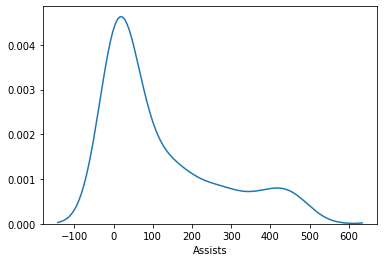

In [28]:
sns.distplot(df1["Assists"], hist=False);

In [29]:
df1["Assists"]= np.log(df1["Assists"])

In [30]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,8.145840,6.727432,4.234107,5.771441,6.025866,5.926926,N,W,6.448889,3.761200,10,475.0,N
2,479,130,18,66,72,76,3,7.392648,6.124683,4.143135,5.411646,5.583496,5.572154,A,W,6.779922,4.406719,14,480.0,A
3,496,141,20,65,78,37,11,8.635509,7.362011,5.416100,6.719013,6.731018,5.869297,N,E,5.298317,2.397895,3,500.0,N
4,321,87,10,39,42,30,2,5.981414,4.615121,2.484907,3.871201,3.828641,3.496508,N,E,6.690842,3.688879,4,91.5,N
5,594,169,4,74,51,35,11,8.391176,7.032624,2.944439,6.216606,5.817111,5.267858,A,W,5.641907,6.042633,25,750.0,A


In [31]:
# get dummies

df1 =pd.get_dummies(df1,columns= ["League","Division","NewLeague"], drop_first=True)
df1.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,8.145840,6.727432,4.234107,5.771441,6.025866,5.926926,6.448889,3.761200,10,475.0,1,1,1
2,479,130,18,66,72,76,3,7.392648,6.124683,4.143135,5.411646,5.583496,5.572154,6.779922,4.406719,14,480.0,0,1,0


In [32]:
numeric_df1=df1.loc[:, "AtBat":"Errors"]
cat_df1=df1.loc[:, "League_N":"NewLeague_N"]
y_df1= df1["Salary"]

In [33]:
y_df1

1       475.000
2       480.000
3       500.000
4        91.500
5       750.000
6        70.000
7       100.000
8        75.000
9      1100.000
10      517.143
11      512.500
12      550.000
13      700.000
14      240.000
16      775.000
17      175.000
19      135.000
20      100.000
21      115.000
23      600.000
24      776.667
25      765.000
26      708.333
27      750.000
28      625.000
29      900.000
31      110.000
33      612.500
34      300.000
35      850.000
37       90.000
40       67.500
43      180.000
45      305.000
46      215.000
47      247.500
49      815.000
50      875.000
51       70.000
53     1200.000
54      675.000
55      415.000
56      340.000
58      416.667
59     1350.000
60       90.000
61      275.000
62      230.000
63      225.000
65      950.000
67       75.000
68      105.000
70      320.000
72      850.000
73      535.000
74      933.333
75      850.000
76      210.000
78      325.000
79      275.000
81      450.000
82     1975.000
84     1

In [34]:
numeric_df1.isin(['-inf']).any()==True

AtBat      False
Hits       False
HmRun      False
Runs       False
RBI        False
Walks      False
Years      False
CAtBat     False
CHits      False
CHmRun      True
CRuns      False
CRBI       False
CWalks     False
PutOuts     True
Assists     True
Errors     False
dtype: bool

In [35]:
numeric_df1[numeric_df1["CHmRun"].astype("str").str.get(1)=="i"].index

Int64Index([7, 188, 239], dtype='int64')

In [36]:
numeric_df1[numeric_df1["CHmRun"].astype("str").str.get(1)=="i"]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
7,298,73,0,24,24,7,3,6.232448,4.682131,-inf,3.713572,3.610918,2.484907,4.795791,5.645447,9
188,279,64,0,31,26,30,1,5.631212,4.158883,-inf,3.433987,3.258097,3.401197,4.672829,5.323010,16
239,309,72,0,33,31,26,5,5.869297,4.406719,-inf,3.713572,3.465736,3.258097,4.762174,5.594711,12


In [37]:
numeric_df1["CHmRun"].describe()

count    263.000000
mean           -inf
std             NaN
min            -inf
25%        2.708050
50%        3.688879
75%        4.527194
max        6.306275
Name: CHmRun, dtype: float64

In [38]:
# assign median to infinite values in CHmRun

numeric_df1.loc[[7, 188, 239],"CHmRun"]=3.688879
numeric_df1["CHmRun"].describe()

count    263.000000
mean       3.545969
std        1.338114
min        0.000000
25%        2.772589
50%        3.688879
75%        4.527194
max        6.306275
Name: CHmRun, dtype: float64

In [39]:
numeric_df1[numeric_df1["PutOuts"].astype("str").str.get(1)=="i"].index

Int64Index([9, 65, 132, 149, 186, 196, 198, 207, 249, 251, 267], dtype='int64')

In [40]:
numeric_df1["PutOuts"].describe()

count    263.000000
mean           -inf
std             NaN
min            -inf
25%        4.731560
50%        5.411646
75%        5.776073
max        7.227662
Name: PutOuts, dtype: float64

In [41]:
# assign median to infinite values in PutOuts

numeric_df1.loc[[9, 65, 132, 149, 186, 196, 198, 207, 249, 251, 267],"PutOuts"]=5.411646
numeric_df1["PutOuts"].describe()

count    263.000000
mean       5.391108
std        0.783816
min        3.332205
25%        4.890349
50%        5.411646
75%        5.776073
max        7.227662
Name: PutOuts, dtype: float64

In [42]:
numeric_df1[numeric_df1["Assists"].astype("str").str.get(1)=="i"].index

Int64Index([9, 65, 132, 149, 176, 186, 196, 198, 207, 249, 251, 255, 267, 304], dtype='int64')

In [43]:
numeric_df1["Assists"].describe()

count    263.000000
mean           -inf
std             NaN
min            -inf
25%        2.079442
50%        3.806662
75%        5.256830
max        6.198479
Name: Assists, dtype: float64

In [44]:
# assign median to infinite values in Assists

numeric_df1.loc[[9, 65, 132, 149, 176, 186, 196, 198, 207, 249, 251, 255, 267, 304],"Assists"]=3.806662
numeric_df1["Assists"].describe()

count    263.000000
mean       3.770412
std        1.669427
min        0.000000
25%        2.197225
50%        3.806662
75%        5.256830
max        6.198479
Name: Assists, dtype: float64

In [45]:
df2=numeric_df1.copy()

# LOF  Outlier Detection

clf= LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df2)

df2_scores=clf.negative_outlier_factor_
np.sort(df2_scores)[0:10]

array([-3.75685683, -3.74909694, -1.73878565, -1.68731093, -1.66555654,
       -1.65392056, -1.57259165, -1.54709327, -1.5016735 , -1.43690993])

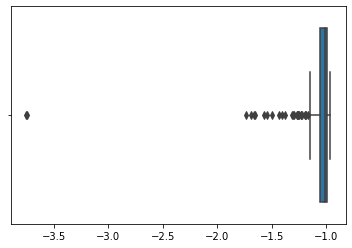

In [46]:
sns.boxplot(df2_scores);

In [47]:
outlier_indexes=df2.loc[df2_scores< -1.73878565]
outlier_indexes

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
217,20,1,0,0,0,0,2,3.713572,2.197225,0.693147,1.791759,1.945910,1.386294,4.356709,5.393628,6
295,19,4,1,2,3,1,1,2.944439,1.386294,0.000000,0.693147,1.098612,0.000000,6.539586,4.248495,8


In [48]:
# Throw away outliers from Salary feature also according to these indexes .

In [49]:
y_df1=pd.DataFrame(y_df1).drop(index=[217,295])
y_df1=y_df1.reset_index(drop=True)
print(y_df1.shape )
y_df1.head(2)

(261, 1)


,Salary
0,475.0
1,480.0


In [50]:
df2= df2.loc[df2_scores> -1.73878565]
df2=df2.reset_index(drop=True)
print(df2.shape)
df2.head(2)

(261, 16)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,315,81,7,24,38,39,14,8.145840,6.727432,4.234107,5.771441,6.025866,5.926926,6.448889,3.761200,10
1,479,130,18,66,72,76,3,7.392648,6.124683,4.143135,5.411646,5.583496,5.572154,6.779922,4.406719,14


In [51]:
# Throw away outliers from dummies also according to these indexes .

In [52]:
cat_df1=pd.DataFrame(cat_df1).drop(index=[217,295])
cat_df1=cat_df1.reset_index(drop=True)
print(cat_df1.shape)
cat_df1.head(2)

(261, 3)


,League_N,Division_W,NewLeague_N
0,1,1,1
1,0,1,0


In [53]:
y_df1

,Salary
0,475.000
1,480.000
2,500.000
3,91.500
4,750.000
5,70.000
6,100.000
7,75.000
8,1100.000
9,517.143


In [54]:
df3= pd.concat([df2,y_df1,cat_df1], axis=1)
df3

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,8.145840,6.727432,4.234107,5.771441,6.025866,5.926926,6.448889,3.761200,10,475.000,1,1,1
1,479,130,18,66,72,76,3,7.392648,6.124683,4.143135,5.411646,5.583496,5.572154,6.779922,4.406719,14,480.000,0,1,0
2,496,141,20,65,78,37,11,8.635509,7.362011,5.416100,6.719013,6.731018,5.869297,5.298317,2.397895,3,500.000,1,0,1
3,321,87,10,39,42,30,2,5.981414,4.615121,2.484907,3.871201,3.828641,3.496508,6.690842,3.688879,4,91.500,1,0,1
4,594,169,4,74,51,35,11,8.391176,7.032624,2.944439,6.216606,5.817111,5.267858,5.641907,6.042633,25,750.000,0,1,0
5,185,37,1,23,8,21,2,5.365976,3.737670,0.000000,3.401197,2.197225,3.178054,4.330733,4.844187,7,70.000,1,0,0
6,298,73,0,24,24,7,3,6.232448,4.682131,3.688879,3.713572,3.610918,2.484907,4.795791,5.645447,9,100.000,0,1,0
7,323,81,6,26,32,8,2,5.831882,4.454347,1.791759,3.465736,3.526361,2.079442,4.962845,5.669881,19,75.000,1,1,1
8,401,92,17,49,66,65,13,8.557567,7.194437,5.533389,6.664409,6.791221,6.763885,5.411646,3.806662,0,1100.000,0,0,0
9,574,159,21,107,75,59,10,8.440528,7.170120,4.499810,6.553933,6.222576,6.190315,5.472271,6.098074,22,517.143,0,0,0


## 2nd Trial : df4

* **df2-->df10-->df4**

* drop NA values
* log transformation
* detect outliers and drop them
* standardize df2
* size= 322-->261

In [55]:
df2.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,315,81,7,24,38,39,14,8.145840,6.727432,4.234107,5.771441,6.025866,5.926926,6.448889,3.761200,10
1,479,130,18,66,72,76,3,7.392648,6.124683,4.143135,5.411646,5.583496,5.572154,6.779922,4.406719,14


In [56]:
df2_columns=df2.columns
standardized_df2=preprocessing.scale(df2)
standardized_df2=pd.DataFrame(standardized_df2, columns=df2_columns)
standardized_df2.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.637445,-0.624486,-0.539613,-1.238902,-0.542694,-0.112988,1.391241,0.675116,0.567265,0.506382,0.317627,0.659463,0.798012,1.357619,-0.000695,0.210761
1,0.504004,0.482758,0.721974,0.431148,0.787655,1.610755,-0.912250,-0.091202,-0.018092,0.436965,-0.026385,0.256900,0.468814,1.782310,0.386001,0.815250


In [57]:
y_df10=hitters.dropna()["Salary"]
y_df10=pd.DataFrame(y_df10).drop(index=[217,295])
y_df10=y_df10.reset_index(drop=True)
y_df10.shape

(261, 1)

In [58]:
cat_df10=cat_df1.reset_index(drop=True)

In [59]:
df4= pd.concat([standardized_df2,y_df10,cat_df10], axis=1)
df4

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.637445,-0.624486,-0.539613,-1.238902,-0.542694,-0.112988,1.391241,0.675116,0.567265,0.506382,0.317627,0.659463,0.798012,1.357619,-0.000695,0.210761,475.000,1,1,1
1,0.504004,0.482758,0.721974,0.431148,0.787655,1.610755,-0.912250,-0.091202,-0.018092,0.436965,-0.026385,0.256900,0.468814,1.782310,0.386001,0.815250,480.000,0,1,0
2,0.622324,0.731324,0.951353,0.391385,1.022423,-0.206164,0.763016,1.173320,1.183534,1.408312,1.223633,1.301161,0.744537,-0.118483,-0.817378,-0.847095,500.000,1,0,1
3,-0.595684,-0.488905,-0.195544,-0.642456,-0.386182,-0.532277,-1.121658,-1.527029,-1.484100,-0.828360,-1.499256,-1.340042,-1.457206,1.668027,-0.044019,-0.695973,91.500,1,0,1
4,1.304409,1.364035,-0.883682,0.749252,-0.034031,-0.299339,0.763016,0.924729,0.863652,-0.477710,0.743265,0.469493,0.186454,0.322318,1.365988,2.477594,750.000,0,1,0
5,-1.542251,-1.618747,-1.227751,-1.278665,-1.716531,-0.951566,-1.121658,-2.153192,-2.336233,-2.724489,-1.948643,-2.824655,-1.752704,-1.359825,0.648064,-0.242606,70.000,1,0,0
6,-0.755765,-0.805261,-1.342441,-1.238902,-1.090484,-1.603793,-0.912250,-1.271620,-1.419022,0.090341,-1.649971,-1.538174,-2.395884,-0.763190,1.128056,0.059638,100.000,0,1,0
7,-0.581764,-0.624486,-0.654303,-1.159376,-0.777461,-1.557206,-1.121658,-1.679167,-1.640234,-1.357272,-1.886935,-1.615122,-2.772121,-0.548871,1.142693,1.570861,75.000,1,1,1
8,-0.038880,-0.375921,0.607284,-0.244825,0.552888,1.098291,1.181833,1.094019,1.020796,1.497811,1.171424,1.355947,1.574637,0.026909,0.026538,-1.300462,1100.000,0,0,0
9,1.165208,1.138067,1.066043,2.061435,0.905039,0.818765,0.553608,0.974941,0.997180,0.709129,1.065795,0.838472,1.042414,0.104686,1.399200,2.024228,517.143,0,0,0


## 3rd Trial : df5

* **df4-->df5**

* drop NA values
* log transformation
* detect outliers and drop them
* standardize df2
* generating variables
* size= 322-->261

In [60]:
df5=df4.copy()

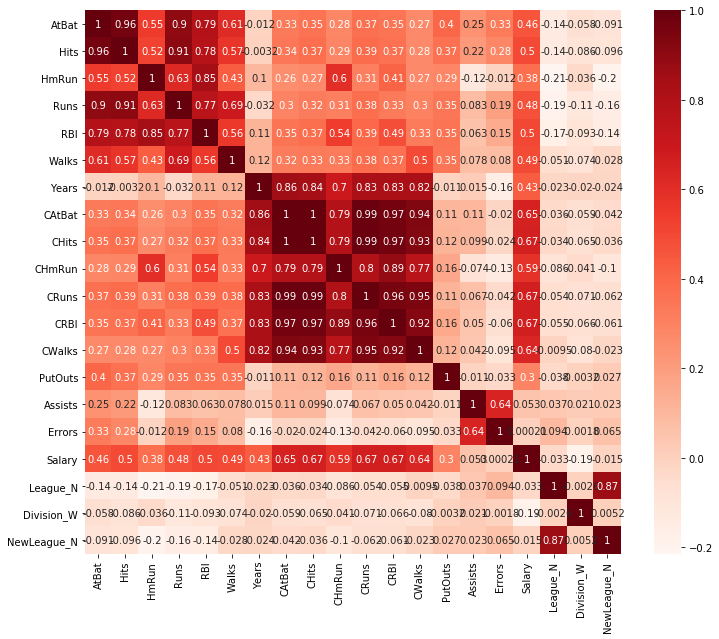

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(df5.corr(), annot=True, cmap=plt.cm.Reds);

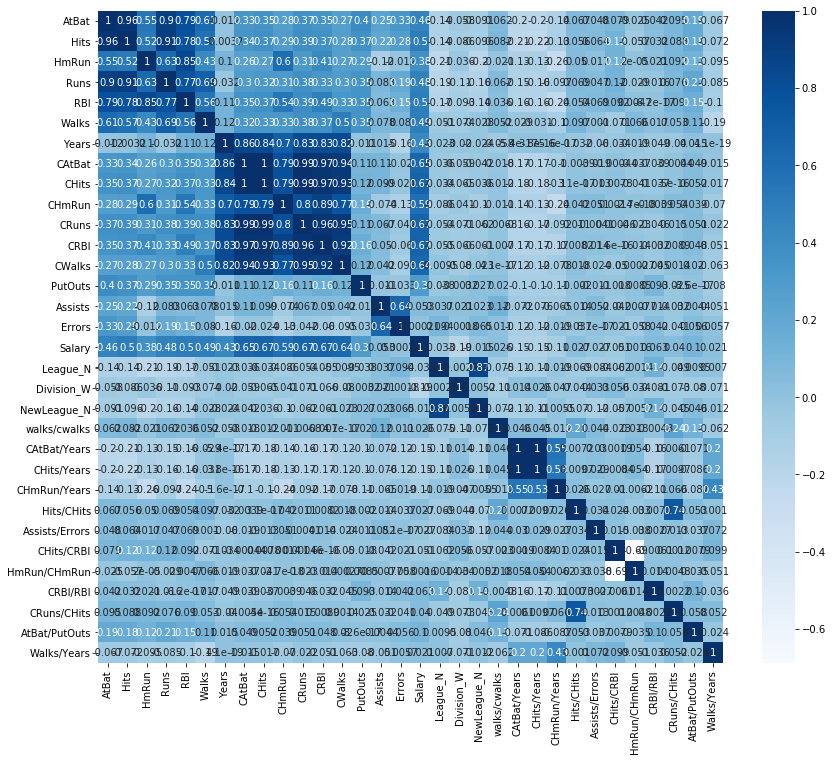

In [62]:
df5["walks/cwalks"]= df5["Walks"]/df5["CWalks"]
df5["CAtBat/Years"]= df5["CAtBat"]/df5["Years"]
df5["CHits/Years"]= df5["CHits"]/df5["Years"]
df5["CHmRun/Years"]= df5["CHmRun"]/df5["Years"]
df5["Hits/CHits"]= df5["Hits"]/df5["CHits"]
df5["Assists/Errors"]= df5["Assists"]/df5["Errors"]
df5["CHits/CRBI"]= df5["CHits"]/df5["CRBI"]
df5["HmRun/CHmRun"]= df5["HmRun"]/df5["CHmRun"]
df5["CRBI/RBI"]= df5["CRBI"]/df5["RBI"]
df5["CRuns/CHits"]= df5["CRuns"]/df5["CHits"]
df5["AtBat/PutOuts"]= df5["AtBat"]/df5["PutOuts"]
df5["Walks/Years"]=df5["Walks"]/df5["Years"]

plt.figure(figsize=(14,12))
sns.heatmap(df5.corr(), annot=True, cmap=plt.cm.Blues);

## 4th Trial : df6

* **df3-->df6**

* drop NA values
* log transformation
* detect outliers and drop them
* generating variables
* size= 322-->261

In [63]:
df6=df3.copy()

df6["walks/cwalks"]= df6["Walks"]/df6["CWalks"]
df6["CAtBat/Years"]= df6["CAtBat"]/df6["Years"]
df6["CHits/Years"]= df6["CHits"]/df6["Years"]
df6["CHmRun/Years"]= df6["CHmRun"]/df6["Years"]
df6["Hits/CHits"]= df6["Hits"]/df5["CHits"]
df6["CHits/CRBI"]= df6["CHits"]/df6["CRBI"]
df6["CRBI/RBI"]= df6["CRBI"]/df6["RBI"]
df6["CRuns/CHits"]= df6["CRuns"]/df6["CHits"]
df6["AtBat/PutOuts"]= df6["AtBat"]/df6["PutOuts"]
df6["Walks/Years"]=df6["Walks"]/df6["Years"]

# MODELING

## df3 modeling

In [64]:
y=df3["Salary"]
X=df3.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))


for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 237.69412768445758
Ridge 236.96417696998478
Lasso 237.76714848676093
ElasticNet 248.48087478068783
KNN 311.7279415048321
CART 349.89034582684644
RF 220.92540749771086
SVR 335.3965142539395
GBM 218.81980204824475
XGBoost 260.53439417822244
LightGBM 191.9331636122688
CatBoost 218.52529620453362


## df4 modeling

In [65]:
y=df4["Salary"]
X=df4.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))


for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 237.69412768445724
Ridge 237.98328770680047
Lasso 238.821192936884
ElasticNet 248.4642728336493
KNN 232.92070806382418
CART 396.1792947375178
RF 225.86057676434493
SVR 327.03015794695307
GBM 214.82865791956849
XGBoost 260.51880837227856
LightGBM 194.78141073758053
CatBoost 213.55567384100868


## df5 modeling

In [66]:
y=df5["Salary"]
X=df5.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))


for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 282.36148012028036
Ridge 289.08285313695313
Lasso 290.95560034362035
ElasticNet 327.8897579018273
KNN 232.32844689304318
CART 228.4780649598804
RF 208.23073738363416
SVR 338.06022311665356
GBM 199.22813728760366
XGBoost 206.92434554511016
LightGBM 213.8786279802105
CatBoost 198.8801954133968


## df6 modeling

In [67]:
y=df6["Salary"]
X=df6.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

models = []

models.append(('Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))


for name, model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(name,rmse)

Regression 194.75764865708777
Ridge 214.75726558803464
Lasso 220.4077693729616
ElasticNet 238.49866939369943
KNN 225.9976345892209
CART 351.7939442452663
RF 204.96952876955058
SVR 338.39166646768405
GBM 220.94400698640365
XGBoost 211.06976272327435
LightGBM 189.4579172494958
CatBoost 211.243997312047


# TUNING

## Feature Importance

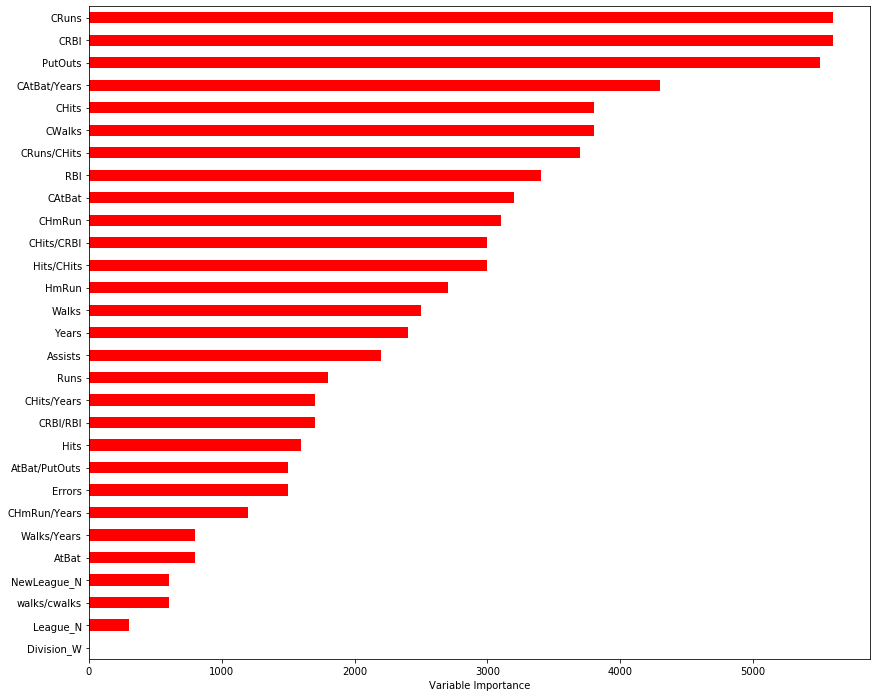

In [68]:
# LGB Feature Importance according to df6


y=df6["Salary"]
X=df6.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

lgb_model = LGBMRegressor().fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


Importance = pd.DataFrame({'Importance':lgb_model.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', figsize=(14,12))

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### LGB Feature Selection and LGBM : df7

In [70]:
# df7

# Feature Selection( throw away the features which are not so important for LGBM)

df7=df6.copy()
df7= df7.drop("Division_W", axis=1)
df7= df7.drop("League_N", axis=1)

In [71]:
y=df7["Salary"]
X=df7.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

lgb_model = LGBMRegressor().fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

186.86024015105374

In [72]:
?LGBMRegressor

# Default Parameters

boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    kwargs,

In [73]:
lgbm_params= { "boosting_type" : ["dart"],
              "learning_rate": [0.09, 0.1,0.11, 0.2],
              "n_estimators": [90,100,110,150],
              "num_leaves" :[30,31,32],
              "max_depth": [7,10],
              "colsample_bytree": [1,0.8,0.5,0.4]}

In [74]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:   59.9s finished


In [75]:
lgbm_cv_model.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 90,
 'num_leaves': 30}

In [76]:
tuned_lgbm= LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred= tuned_lgbm.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


183.9808049181818

In [78]:
#Check train error to control overfitting

tuned_lgbm2= LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred2= tuned_lgbm.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred2))

190.26363916375158

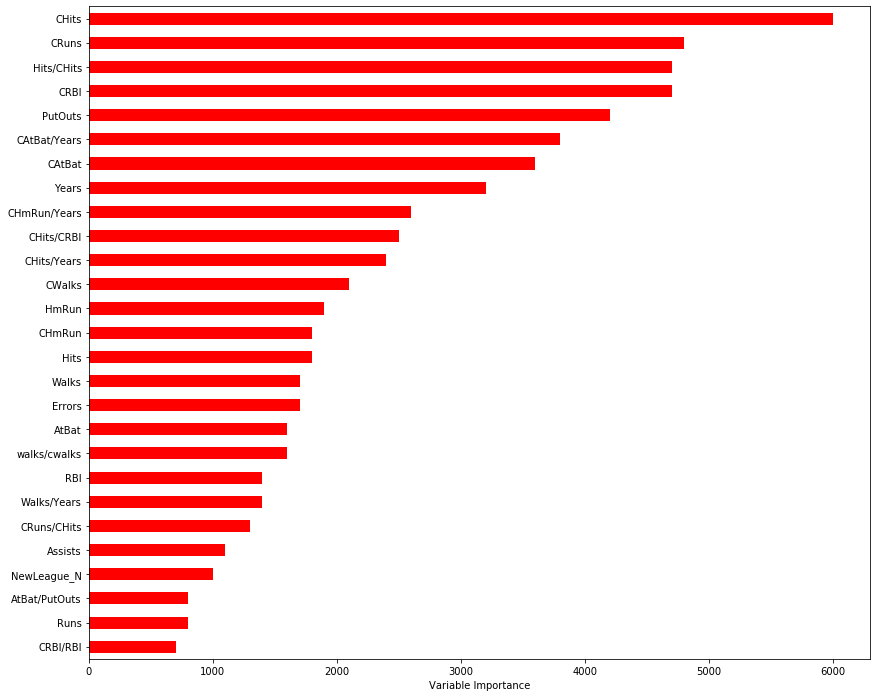

In [80]:
# LGB Feature Importance according to final df and final model


y=df7["Salary"]
X=df7.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

lgb_model = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


Importance = pd.DataFrame({'Importance':lgb_model.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', figsize=(14,12))

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# REPORTING


## 1. Data Understanding
> 1. Kütüphaneler import edildi.Hitters veri setindeki gözlem sayısı, değişken türleri, eksik değerler ve değişkenler arası korelasyonlar incelendi.

> 2. Salary değişkenine atama yapılabilecek bir ilişki var mı diye araştırıldı, Division kategorilerinin maaşlarında anlamlı farklılık olduğu gözlemlense de, hedef değişken olması sebebiyle atama yapılmadı.


## 2. Data Preprocessing
> 1. Veri seti,birbirinden farklı 4 ön işleme sürecinden geçti. Nihai olarak 4 data frame oluşturuldu. (df3-df4-df5-df6)

> 2. df3 -> NA değerleri atıldı.Skewness değeri -1 ile 1 arasında olmayanların sağa çarpık oldukları distplot ile gözlemlendi.

> 3. df3 -> CAtBat - CHits - CHmRun - CRuns - CRBI - CWalks - PutOuts - Assists değişkenlerine log transformation yapıldı. -∞ (-inf) gelen değerlere median ataması yapıldı.Çarpıklıkları giderildi.

> 4. df3 -> df1 veri seti, kategorik, numerik ve hedef değişkene göre split edildi. Kategorik değişkenlere dummy dönüşümü yapıldı.

> 5. df3 -> LOC ile outlierlar tespit edildi. Boxplot ile incelendi, diğer skorlardan çok uzakta kalan 2 gözlemin indexi belirlendikten sonra kategorik, numerik ve hedef değişken içeren dflerden ayrı ayrı atıldı.

> 6. df3 -> concat ile kategorik, numerik ve hedef değişken içeren df ler birleştirildi. 261 gözlem içeren nihai df oluşturuldu ve df3 ismi verildi.

> 7. df4 -> Yukarıda oluşturulan df3 standardize edildi. (mean 0, std=1)

> 8. df5 -> Yukarıda oluşturulan df4 üzerine yeni değişkenler eklendi. Bunlar: walks/cwalks, CAtBat/Years, CHits/Years , CHmRun/Years, Hits/CHits, Assists/Errors, CHits/CRBI, HmRun/CHmRun, CRBI/RBI, CRuns/CHits, AtBat/PutOuts, Walks/Years

> 9. df6 -> Yukarıda oluşturulan df3 üzerine yeni değişkenler eklendi. Bunlar: walks/cwalks, CAtBat/Years, CHits/Years , CHmRun/Years, Hits/CHits, CHits/CRBI, CRBI/RBI, CRuns/CHits, AtBat/PutOuts, Walks/Years   


## 3. Modeling

> 1. Yukarıda belirtilen 4 data frame modellere fit ettirildi. ( Regression-Ridge- Lasso-Elastic Net- KNN - CART - RF- SVR - GBM - XGBoost - LightGBM - CatBoost)

> 2. **df3 -> en iyi RMSE -> LightGBM 191.9**

> 3. **df4 -> en iyi RMSE -> LightGBM 194.7**

> 4. **df5 -> en iyi RMSE -> CatBoost 198.8**

> 5. **df6 -> en iyi RMSE -> LightGBM 189.4**

> 6. 4 data setinde genel olarak Light GBM ile daha düşük hata elde edildi. En iyi sonuç ise 189 ile df6ya fit edilen Light GBM ile elde edildi. 


## 4. Tuning

> 1. Light GBM feature selection ile önemi çok az olan 2 değişkeni attım -> **df7-> LightGBM 186.8**

> 2. Hiperparametrelerden, boosting_type, learning_rate, n_estimators, num_leaves, max_depth, colsample_bytree değerleri denenerek en iyi model bulunmaya çalışıldı -> **LightGBM 183.9**


# Sonuç:
> **Nihai RMSE 183.9 olarak hesaplandı.
> Train verisi üzerinde overfitting kontrolü yapıldı ve olmadığı gözlemlendi.
> Nihai modele göre en önemli değişkenler saptandı.**
